In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../gefera')
import gefera as gf
sys.path.append('../pd')
from pd import time

In [2]:
t = np.linspace(67.8, 68.8, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.9
em = 0.1
pm = 5
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 89.0 * np.pi / 180
mm = 0.5

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys_complex = gf.System(po, mo)
%time lc = sys_complex.lightcurve(t, u1, u2, rp, rm, grad=False)

CPU times: user 1.5 ms, sys: 851 µs, total: 2.35 ms
Wall time: 1.42 ms


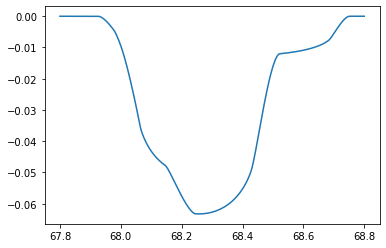

In [3]:
plt.plot(t, lc)

In [5]:
t = np.linspace(67.7, 68.7, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.1
em = 0.1
pm = 5
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 89.0 * np.pi / 180
mm = 0.5

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys_simple = gf.System(po, mo)
%time lc = sys_simple.lightcurve(t, u1, u2, rp, rm)

CPU times: user 1.17 ms, sys: 720 µs, total: 1.89 ms
Wall time: 1.17 ms


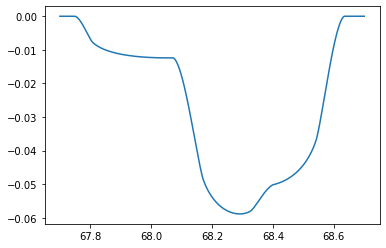

In [6]:
plt.plot(t, lc)

In [7]:
n = np.logspace(1, 6, 6, dtype=int)
times_complex_phot_only = np.zeros(len(n))
times_complex_dynamics = np.zeros(len(n))
times_complex_pd = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_complex_phot_only[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=False, phot_only=True)
    times_complex_dynamics[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=False)
    times_complex_pd[i] = time(t, u1, u2, rp, rm, 20, sys_complex)
    
times_simple_phot_only = np.zeros(len(n))
times_simple_dynamics = np.zeros(len(n))
times_simple_pd = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_simple_phot_only[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=False, phot_only=True)
    times_simple_dynamics[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=False)
    times_simple_pd[i] = time(t, u1, u2, rp, rm, 20, sys_simple)

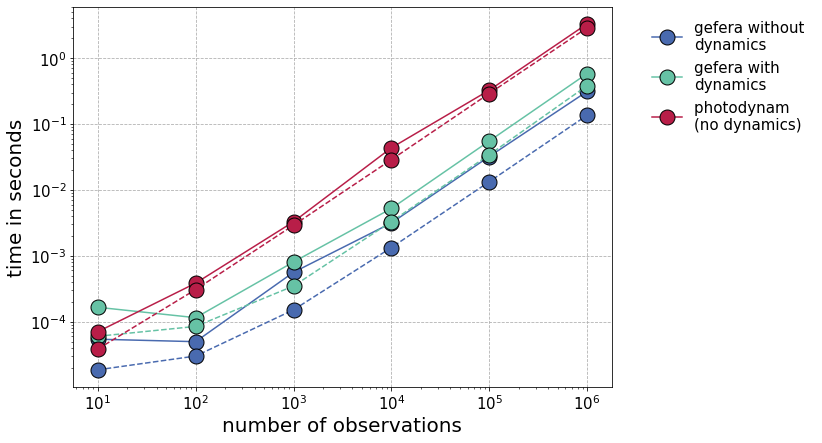

In [8]:
from matplotlib import cm
plt.figure(figsize=(13, 7))

plt.loglog(n, times_complex_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.95), label='gefera without \ndynamics')
plt.loglog(n, times_simple_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.95))

plt.loglog(n, times_complex_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.8), label='gefera with \ndynamics')
plt.loglog(n, times_simple_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.8))

plt.loglog(n, times_complex_pd, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.05), label='photodynam \n(no dynamics)')
plt.loglog(n, times_simple_pd, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.05))

plt.grid(linestyle='--')
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), frameon=False)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('number of observations', fontsize=20)
plt.ylabel('time in seconds', fontsize=20)
plt.subplots_adjust(right=0.7)
plt.savefig('/Users/tgordon/Desktop/benchmarks_nograd.pdf')

In [9]:
n = np.logspace(1, 6, 6, dtype=int)
times_complex_phot_only_grad = np.zeros(len(n))
times_complex_dynamics_grad = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_complex_phot_only_grad[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=True, phot_only=True)
    times_complex_dynamics_grad[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=True)
    
times_simple_phot_only_grad = np.zeros(len(n))
times_simple_dynamics_grad = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_simple_phot_only_grad[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=True, phot_only=True)
    times_simple_dynamics_grad[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=True)

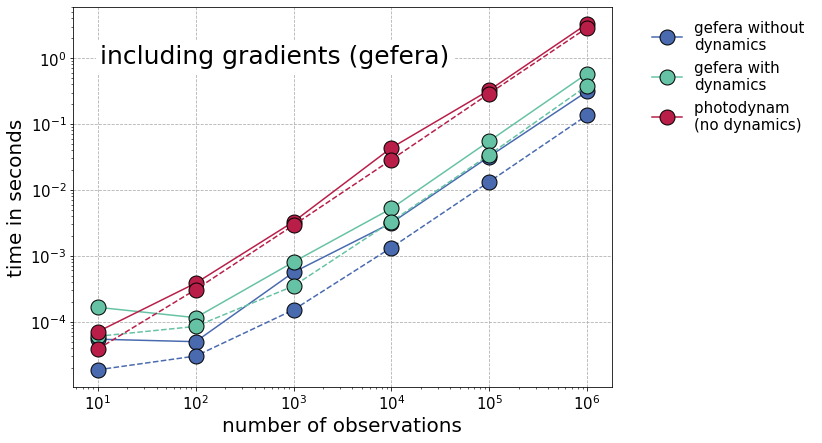

In [10]:
from matplotlib import cm
plt.figure(figsize=(13, 7))

plt.loglog(n, times_complex_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.95), label='gefera without \ndynamics')
plt.loglog(n, times_simple_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.95))

plt.loglog(n, times_complex_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.8), label='gefera with \ndynamics')
plt.loglog(n, times_simple_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.8))

plt.loglog(n, times_complex_pd, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.05), label='photodynam \n(no dynamics)')
plt.loglog(n, times_simple_pd, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.05))

plt.grid(linestyle='--')
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), frameon=False)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('number of observations', fontsize=20)
plt.ylabel('time in seconds', fontsize=20)
plt.subplots_adjust(right=0.7)

plt.annotate('including gradients (gefera)', 
             xy=(0.05, 0.85), 
             xycoords='axes fraction', 
             fontsize=25, 
             bbox={'alpha':1.0, 'color':'w'})

plt.savefig('/Users/tgordon/Desktop/benchmarks_grad.pdf')

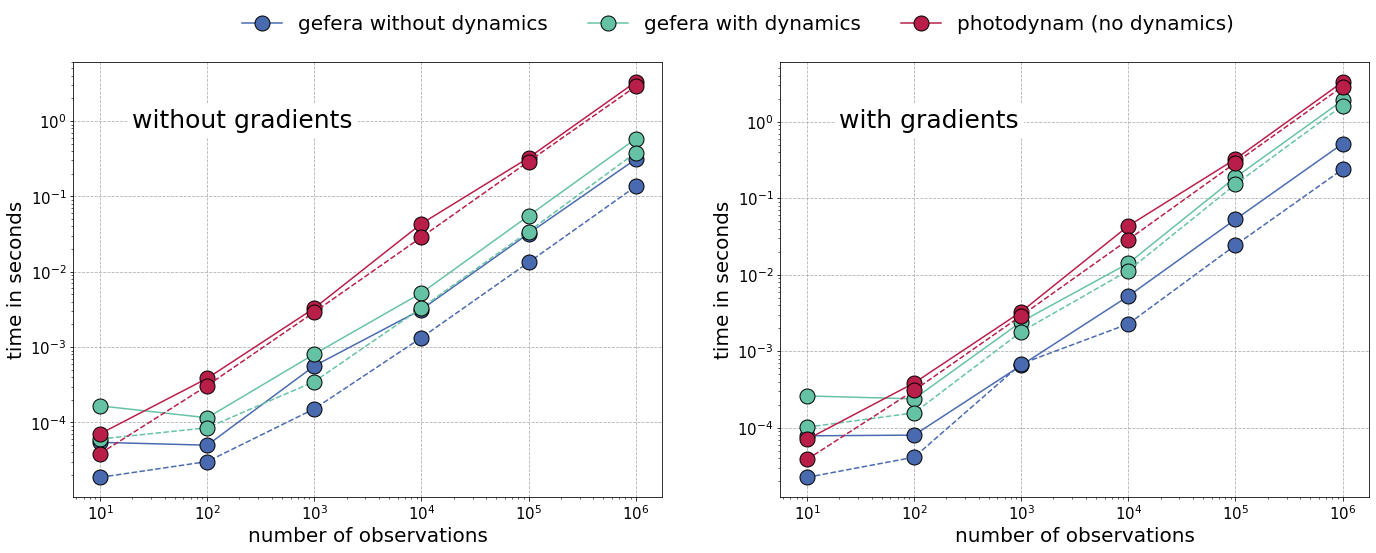

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].loglog(n, times_complex_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.95), label='gefera without \ndynamics')
axs[0].loglog(n, times_simple_phot_only, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.95))

axs[0].loglog(n, times_complex_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.8), label='gefera with \ndynamics')
axs[0].loglog(n, times_simple_dynamics, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.8))

axs[0].loglog(n, times_complex_pd, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.05), label='photodynam \n(no dynamics)')
axs[0].loglog(n, times_simple_pd, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.05))

axs[0].grid(linestyle='--')
#axs[0].legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), frameon=False)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_xlabel('number of observations', fontsize=20)
axs[0].set_ylabel('time in seconds', fontsize=20)

axs[1].loglog(n, times_complex_phot_only_grad, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.95), label='gefera without dynamics')
axs[1].loglog(n, times_simple_phot_only_grad, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.95))

axs[1].loglog(n, times_complex_dynamics_grad, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.8), label='gefera with dynamics')
axs[1].loglog(n, times_simple_dynamics_grad, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.8))

axs[1].loglog(n, times_complex_pd, 'o', markeredgecolor='k', markersize=15, linestyle='-', color=cm.Spectral(0.05), label='photodynam (no dynamics)')
axs[1].loglog(n, times_simple_pd, 'o', markeredgecolor='k', markersize=15, linestyle='--', color=cm.Spectral(0.05))

axs[1].grid(linestyle='--')
axs[1].legend(fontsize=20, bbox_to_anchor=(0.8, 1.15), frameon=False, ncol=3)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].set_xlabel('number of observations', fontsize=20)
axs[1].set_ylabel('time in seconds', fontsize=20)

axs[0].annotate('without gradients', xy=(0.1, 0.85), 
                xycoords='axes fraction', fontsize=25, bbox={'color':'w'})
axs[1].annotate('with gradients', xy=(0.1, 0.85), 
                xycoords='axes fraction', fontsize=25, bbox={'color':'w'})

plt.subplots_adjust(left=0.05, right=0.95)
plt.savefig('/Users/tgordon/Desktop/benchmark.pdf')

In [12]:
times_simple_pd / times_simple_phot_only

array([ 2.0668584 , 10.19776398, 19.2198368 , 21.55425686, 21.80000498,
       21.22838997])

In [13]:
times_complex_pd / times_complex_phot_only

array([ 1.29858308,  7.72173681,  5.84090008, 13.7905428 , 10.13696151,
       10.60526574])

In [14]:
times_simple_pd / times_simple_dynamics

array([0.64087589, 3.62428614, 8.36714997, 8.69168333, 8.48465239,
       7.55411294])

In [15]:
times_simple_pd / times_simple_phot_only_grad

array([ 1.71204173,  7.46057022,  4.25595157, 12.60282156, 11.91366159,
       12.06305946])

In [16]:
times_complex_pd / times_complex_phot_only_grad

array([0.89854798, 4.79983888, 5.01493265, 8.27525239, 6.1466138 ,
       6.40610018])